<a href="https://colab.research.google.com/github/Khair1212/RFM_Segmentation/blob/main/RFM_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import preprocessing

In [ ]:
retail_df = pd.read_excel("/content/drive/MyDrive/Dataset/Retail_Data/Online Retail.xlsx")

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_df['date'] = pd.to_datetime(retail_df['InvoiceDate'])

In [ ]:
def unique_counts(retail_df):
  for i in retail_df.columns:
    count = retail_df[i].nunique()
    print(i," ",count)
unique_counts(retail_df)

InvoiceNo   25900
StockCode   4070
Description   4223
Quantity   722
InvoiceDate   23260
UnitPrice   1630
CustomerID   4372
Country   38
date   23260


### Calculate total price

In [ ]:


retail_df['Total_Price']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,54.08


### Only consider rows without NaN values and store the data in dataset 

In [ ]:

Online_retail_df = retail_df[np.isfinite(retail_df['CustomerID'])]

# check the unique values

In [ ]:
Online_retail_df = retail_df[np.isfinite(retail_df['CustomerID'])]

In [ ]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_retail = Online_retail_df[Online_retail_df['Quantity'] > 0]

In [ ]:
final_retail.shape

In [ ]:
unique_counts(final_retail)

InvoiceNo   18536
StockCode   3665
Description   3877
Quantity   302
InvoiceDate   17286
UnitPrice   441
CustomerID   4339
Country   37
date   17286


In [ ]:
final_retail['date'].min()

Timestamp('2010-12-01 08:26:00')

In [ ]:
final_retail.to_csv("sales_tramsaction.csv")

##  Calculate RFM value of each customer
#### Assumption: In this final dataset , I have removed all the transaction with negative quantity value

In [ ]:
#Calculate recency and frequency
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [ ]:
final_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,16.60


In [ ]:
rfm = final_retail.groupby('CustomerID').agg({'date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfm['Date'] = rfmTable['date'].astype(int)
rfm.rename(columns={'Date': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [ ]:
rfm

,date,frequency,monetary_value,recency
CustomerID,,,,
12346.0,325,1,77183.60,325
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,75
12349.0,18,73,1757.55,18
12350.0,310,17,334.40,310
...,...,...,...,...
18280.0,277,10,180.60,277
18281.0,180,7,80.82,180
18282.0,7,12,178.05,7


In [ ]:
rfm['recency_normalized']=pd.qcut(rfm['recency'],50,labels=False)
rfm['recency_normalized']= rfm['recency_normalized']+1
rfm['frequency_normalized']=pd.qcut(rfm['frequency'],50,labels=False)
rfm['frequency_normalized']=rfm['frequency_normalized']+1
rfm['monetary_value_normalized']=pd.qcut(rfm['monetary_value'],50,labels=False)
rfm['monetary_value_normalized']=rfm['monetary_value_normalized']+1

In [ ]:
rfm

,date,frequency,monetary_value,recency,recency_normalized,frequency_normalized,monetary_value_normalized
CustomerID,,,,,,,
12346.0,325,1,77183.60,325,49,1,50
12347.0,2,182,4310.00,2,2,45,47
12348.0,75,31,1797.24,75,31,21,39
12349.0,18,73,1757.55,18,13,34,39
12350.0,310,17,334.40,310,48,13,15
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,277,46,7,7
18281.0,180,7,80.82,180,41,5,2
18282.0,7,12,178.05,7,6,9,7


In [ ]:
DF_ARRAY = np.array(rfm.iloc[:,4:8])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

In [ ]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 10)

# Training our model
kmeans.fit(DF_NORM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

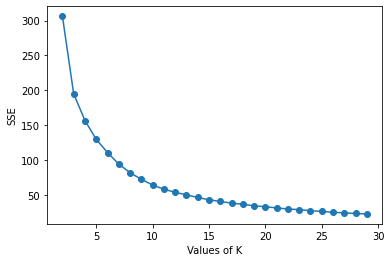

In [ ]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 30)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [ ]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 10)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
rfm['cluster'] = kmeans.labels_

In [ ]:
rfm

,date,frequency,monetary_value,recency,recency_normalized,frequency_normalized,monetary_value_normalized,cluster
CustomerID,,,,,,,,
12346.0,325,1,77183.60,325,49,1,50,6
12347.0,2,182,4310.00,2,2,45,47,3
12348.0,75,31,1797.24,75,31,21,39,2
12349.0,18,73,1757.55,18,13,34,39,7
12350.0,310,17,334.40,310,48,13,15,8
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,277,46,7,7,1
18281.0,180,7,80.82,180,41,5,2,1
18282.0,7,12,178.05,7,6,9,7,7


In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()
    
PLOT.add_trace(go.Scatter3d(x = rfm['recency_normalized'],
                            y = rfm['frequency_normalized'],
                            z = rfm['monetary_value_normalized']
                           )
              )

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(rfm.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = rfm[rfm.cluster == C]['recency_normalized'],
                                y = rfm[rfm.cluster == C]['frequency_normalized'],
                                z = rfm[rfm.cluster == C]['monetary_value_normalized'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'RFM Segment ' + str(C)))

In [ ]:
PLOT.update_layout(width = 1000, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary Value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [ ]:
best : 3 , 2 : average ,7: less recency average, 8:much recency, less monetary,freq, 1: much recency,much less monetary bad than 8 and freq, 9: better than 1 , 

In [ ]:
rfm.head()

,date,frequency,monetary_value,recency,recency_normalized,frequency_normalized,monetary_value_normalized,cluster,çluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,325,49,1,50,6,Can't Lose Them
12347.0,2,182,4310.00,2,2,45,47,3,Champions
12348.0,75,31,1797.24,75,31,21,39,2,At Risk
12349.0,18,73,1757.55,18,13,34,39,7,Promising Customer
12350.0,310,17,334.40,310,48,13,15,8,About to Sleep


In [ ]:
print("Mean Monetary by segment: ",rfm.groupby("cluster")["monetary_value"].mean())
print("Mean frequency by segment: ",rfm.groupby("cluster")["frequency"].mean())
print("Recency by segment: ",rfm.groupby("cluster")["recency"].mean())

Mean Monetary by segment:  cluster
0    4162.834673
1     140.414685
2    1176.057006
3    5882.527477
4     528.138471
5     310.667358
6    1891.710428
7    2638.872248
8     269.336421
9     531.269915
Name: monetary_value, dtype: float64
Mean frequency by segment:  cluster
0     20.018692
1      6.500000
2     59.908082
3    251.291080
4    103.219008
5     57.983740
6      9.572193
7    120.767692
8     17.395626
9     28.098876
Name: frequency, dtype: float64
Recency by segment:  cluster
0     16.420561
1    212.060924
2     81.681458
3      7.268779
4     25.028926
5    124.126016
6    124.438503
7     33.350769
8    191.278330
9    137.489888
Name: recency, dtype: float64


# Let's name the clusters: 

**3:** Champions, (They are the champions)
 
**0:** Loyal customer, (Up-sell higher value products)

**7:** Promising Customer (Recommend other products. Engage in loyalty programs.)

**4:** Potential Loyalist (Up-sell lower value products)

**2:** At Risk (Send personalised email or other messages to reconnect. Provide good offers and share valuable resources.)

**6:** Can't lose them (Win them back. Talk to them. Make them special offers. Make them feel valuable)

**9:** Needs Attention (Away from long time. Help them to get back)

**5:** Needs Awareness (Create brand awareness and help them to get back)  

**8:** About to Sleep (Reactivate them. Share valuable resources. Recommend popular products. Offer discounts.) 

**1:** Hibernating (they are losing, promote to get them back)




In [ ]:
rfm['cluster'] = rfm['cluster'].replace({3:"Champions",0:"Loyal Customer",7:"Promising Customer",4:"Potential Customer",2:"At Risk",6:"Can't Lose Them",9:"Needs Attention",5:"Needs Awareness",8:"About to Sleep",1:"Hibernating"})

In [ ]:
rfm.head()

,CustomerID,date,frequency,monetary_value,recency,recency_normalized,frequency_normalized,monetary_value_normalized,cluster,çluster
0,12346.0,325,1,77183.60,325,49,1,50,Can't Lose Them,Can't Lose Them
1,12347.0,2,182,4310.00,2,2,45,47,Champions,Champions
2,12348.0,75,31,1797.24,75,31,21,39,At Risk,At Risk
3,12349.0,18,73,1757.55,18,13,34,39,Promising Customer,Promising Customer
4,12350.0,310,17,334.40,310,48,13,15,About to Sleep,About to Sleep


In [ ]:
rfm.reset_index(inplace=True)

In [ ]:
#drop irrelavant columns
rfm.drop(["date","recency_normalized","frequency_normalized","monetary_value_normalized"],axis=1,inplace=True)

In [ ]:
rfm.to_csv("RFM_Clustered.csv",index=False)